In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
df = pd.read_table('WhatsApp Chat with 5 yaar.txt',header=None)

In [3]:
df

,0
0,"25/08/2021, 1:46 pm - Messages and calls are e..."
1,"25/08/2021, 1:46 pm - You created group ""Abc"""
2,"25/08/2021, 1:48 pm - You changed the subject ..."
3,"25/08/2021, 1:50 pm - Yuvraj Fis Team: Hah bha..."
4,"25/08/2021, 1:50 pm - Yuvraj Fis Team: Teen pa..."
...,...
567,"03/04/2022, 8:09 pm - Yuvraj Fis Team: Aaj @91..."
568,"03/04/2022, 8:09 pm - Yuvraj Fis Team: <Media ..."
569,"06/04/2022, 12:13 am - Sakshi Fis Team: Kha ho..."
570,"06/04/2022, 12:30 am - Priyanshu Fis Team: <Me..."


In [4]:
def split_time(a):
    return a.split('-')[0]

In [5]:
df['time'] = df[0].apply(split_time)

In [6]:
def split_msg(a):
    l = a.split('-')[1:]
    
    return ' '.join(l)

In [7]:
df['msg'] = df[0].apply(split_msg)

In [8]:
def user(a):
    if ':' in a:
        return a.split(':')[0]
    else:
        return 'Group_Notification'

In [9]:
df['user'] = df['msg'].apply(user)

In [10]:
def user_msg(a):
    if ':' in a:
        l= a.split(':')[1:]
        return ' '.join(l)
    else:
        return a

In [11]:
df['msg1'] = df['msg'].apply(user_msg)

In [12]:
df

,0,time,msg,user,msg1
0,"25/08/2021, 1:46 pm - Messages and calls are e...","25/08/2021, 1:46 pm",Messages and calls are end to end encrypted. ...,Group_Notification,Messages and calls are end to end encrypted. ...
1,"25/08/2021, 1:46 pm - You created group ""Abc""","25/08/2021, 1:46 pm","You created group ""Abc""",Group_Notification,"You created group ""Abc"""
2,"25/08/2021, 1:48 pm - You changed the subject ...","25/08/2021, 1:48 pm","You changed the subject from ""Abc"" to ""Teen P...",Group_Notification,"You changed the subject from ""Abc"" to ""Teen P..."
3,"25/08/2021, 1:50 pm - Yuvraj Fis Team: Hah bha...","25/08/2021, 1:50 pm",Yuvraj Fis Team: Hah bhai naam sahe hai,Yuvraj Fis Team,Hah bhai naam sahe hai
4,"25/08/2021, 1:50 pm - Yuvraj Fis Team: Teen pa...","25/08/2021, 1:50 pm",Yuvraj Fis Team: Teen parinde 😂😜😂😜😂,Yuvraj Fis Team,Teen parinde 😂😜😂😜😂
...,...,...,...,...,...
567,"03/04/2022, 8:09 pm - Yuvraj Fis Team: Aaj @91...","03/04/2022, 8:09 pm",Yuvraj Fis Team: Aaj @919431571432 @919773577...,Yuvraj Fis Team,Aaj @919431571432 @919773577656 tum dono ne ...
568,"03/04/2022, 8:09 pm - Yuvraj Fis Team: <Media ...","03/04/2022, 8:09 pm",Yuvraj Fis Team: <Media omitted>,Yuvraj Fis Team,<Media omitted>
569,"06/04/2022, 12:13 am - Sakshi Fis Team: Kha ho...","06/04/2022, 12:13 am",Sakshi Fis Team: Kha ho sablog ?? @9197735776...,Sakshi Fis Team,Kha ho sablog ?? @919773577656 @918882992849 ...
570,"06/04/2022, 12:30 am - Priyanshu Fis Team: <Me...","06/04/2022, 12:30 am",Priyanshu Fis Team: <Media omitted>,Priyanshu Fis Team,<Media omitted>


In [13]:
df.drop(columns=[0,'msg'],axis=1,inplace=True)

In [14]:
df['time2'] = pd.to_datetime(df.time,dayfirst = True ,errors='coerce')

In [15]:
df

,time,user,msg1,time2
0,"25/08/2021, 1:46 pm",Group_Notification,Messages and calls are end to end encrypted. ...,2021-08-25 13:46:00
1,"25/08/2021, 1:46 pm",Group_Notification,"You created group ""Abc""",2021-08-25 13:46:00
2,"25/08/2021, 1:48 pm",Group_Notification,"You changed the subject from ""Abc"" to ""Teen P...",2021-08-25 13:48:00
3,"25/08/2021, 1:50 pm",Yuvraj Fis Team,Hah bhai naam sahe hai,2021-08-25 13:50:00
4,"25/08/2021, 1:50 pm",Yuvraj Fis Team,Teen parinde 😂😜😂😜😂,2021-08-25 13:50:00
...,...,...,...,...
567,"03/04/2022, 8:09 pm",Yuvraj Fis Team,Aaj @919431571432 @919773577656 tum dono ne ...,2022-04-03 20:09:00
568,"03/04/2022, 8:09 pm",Yuvraj Fis Team,<Media omitted>,2022-04-03 20:09:00
569,"06/04/2022, 12:13 am",Sakshi Fis Team,Kha ho sablog ?? @919773577656 @918882992849 ...,2022-04-06 00:13:00
570,"06/04/2022, 12:30 am",Priyanshu Fis Team,<Media omitted>,2022-04-06 00:30:00


In [16]:
# NaT values can be dropped using dropna function in pandas
df.dropna(inplace=True)

In [17]:
df.drop('time',axis=1,inplace=True)

In [18]:
df

,user,msg1,time2
0,Group_Notification,Messages and calls are end to end encrypted. ...,2021-08-25 13:46:00
1,Group_Notification,"You created group ""Abc""",2021-08-25 13:46:00
2,Group_Notification,"You changed the subject from ""Abc"" to ""Teen P...",2021-08-25 13:48:00
3,Yuvraj Fis Team,Hah bhai naam sahe hai,2021-08-25 13:50:00
4,Yuvraj Fis Team,Teen parinde 😂😜😂😜😂,2021-08-25 13:50:00
...,...,...,...
567,Yuvraj Fis Team,Aaj @919431571432 @919773577656 tum dono ne ...,2022-04-03 20:09:00
568,Yuvraj Fis Team,<Media omitted>,2022-04-03 20:09:00
569,Sakshi Fis Team,Kha ho sablog ?? @919773577656 @918882992849 ...,2022-04-06 00:13:00
570,Priyanshu Fis Team,<Media omitted>,2022-04-06 00:30:00


In [19]:
df['year'] = df.time2.dt.year
df['month'] = df.time2.dt.month_name()
df['day'] = df.time2.dt.day
df['hour'] = df.time2.dt.hour
df['min'] = df.time2.dt.minute

In [20]:
'''df = df[df['msg1'] != ' <Media omitted>']
   df.reset_index(inplace= True)'''

# this is not required in our project we have to use <Media omitted>

"df = df[df['msg1'] != ' <Media omitted>']\n   df.reset_index(inplace= True)"

In [21]:
df

,user,msg1,time2,year,month,day,hour,min
0,Group_Notification,Messages and calls are end to end encrypted. ...,2021-08-25 13:46:00,2021,August,25,13,46
1,Group_Notification,"You created group ""Abc""",2021-08-25 13:46:00,2021,August,25,13,46
2,Group_Notification,"You changed the subject from ""Abc"" to ""Teen P...",2021-08-25 13:48:00,2021,August,25,13,48
3,Yuvraj Fis Team,Hah bhai naam sahe hai,2021-08-25 13:50:00,2021,August,25,13,50
4,Yuvraj Fis Team,Teen parinde 😂😜😂😜😂,2021-08-25 13:50:00,2021,August,25,13,50
...,...,...,...,...,...,...,...,...
567,Yuvraj Fis Team,Aaj @919431571432 @919773577656 tum dono ne ...,2022-04-03 20:09:00,2022,April,3,20,9
568,Yuvraj Fis Team,<Media omitted>,2022-04-03 20:09:00,2022,April,3,20,9
569,Sakshi Fis Team,Kha ho sablog ?? @919773577656 @918882992849 ...,2022-04-06 00:13:00,2022,April,6,0,13
570,Priyanshu Fis Team,<Media omitted>,2022-04-06 00:30:00,2022,April,6,0,30


In [22]:
user_list = df['user'].unique().tolist()

In [23]:
user_list 

['Group_Notification',
 ' Yuvraj Fis Team',
 ' Hitin yadav',
 ' Sakshi Fis Team',
 ' Priyanshu Fis Team',
 ' Sanjana Rawat Fis']

In [24]:
user_list.remove('Group_Notification')
user_list.sort()
user_list.insert(0,'Overall')

In [25]:
df['user'].unique()

array(['Group_Notification', ' Yuvraj Fis Team', ' Hitin yadav',
       ' Sakshi Fis Team', ' Priyanshu Fis Team', ' Sanjana Rawat Fis'],
      dtype=object)

In [26]:
df[df['user'] == ' Hitin yadav']

,user,msg1,time2,year,month,day,hour,min
5,Hitin yadav,Cool hai na,2021-08-25 13:52:00,2021,August,25,13,52
6,Hitin yadav,Isliye rakh diya mene,2021-08-25 13:52:00,2021,August,25,13,52
7,Hitin yadav,<Media omitted>,2021-08-25 13:53:00,2021,August,25,13,53
8,Hitin yadav,<Media omitted>,2021-08-25 13:53:00,2021,August,25,13,53
9,Hitin yadav,<Media omitted>,2021-08-25 13:53:00,2021,August,25,13,53
...,...,...,...,...,...,...,...,...
457,Hitin yadav,<Media omitted>,2022-01-30 00:47:00,2022,January,30,0,47
478,Hitin yadav,Mai hu aaj,2022-01-31 23:55:00,2022,January,31,23,55
480,Hitin yadav,Arey bhai bhai 😂🤣,2022-02-10 02:40:00,2022,February,10,2,40
481,Hitin yadav,<Media omitted>,2022-02-10 02:40:00,2022,February,10,2,40


In [27]:
df[df['user'] == ' Hitin yadav'].shape[0]

102

In [28]:
df['msg1'][10]

' <Media omitted>'

In [29]:
df['msg1'][10].split(' ')

['', '<Media', 'omitted>']

In [30]:
df['msg1'][2]

' You changed the subject from "Abc" to "Teen Parinde"'

In [31]:
df['msg1'][2].split(' ')[1:]

['You',
 'changed',
 'the',
 'subject',
 'from',
 '"Abc"',
 'to',
 '"Teen',
 'Parinde"']

In [32]:
words = []
for i in df['msg1']:
    words.extend(i.split(' ')[1:]) 

# by using extend list is merged with previous list but if we have used append instead a list will get
# added to previos list and we had n no. of list in data
# but by extend we only have a single list all other got merged into one

In [33]:
words[:10]

['Messages',
 'and',
 'calls',
 'are',
 'end',
 'to',
 'end',
 'encrypted.',
 'No',
 'one']

In [34]:
len(words)

2449

In [35]:
new_df = df[df['user'] == ' Hitin yadav']

In [36]:
new_df.shape[0]

102

In [37]:
words = []
for i in new_df['msg1']:
    words.extend(i.split(' ')[1:]) 

In [38]:
len(words)

469

In [39]:
df

,user,msg1,time2,year,month,day,hour,min
0,Group_Notification,Messages and calls are end to end encrypted. ...,2021-08-25 13:46:00,2021,August,25,13,46
1,Group_Notification,"You created group ""Abc""",2021-08-25 13:46:00,2021,August,25,13,46
2,Group_Notification,"You changed the subject from ""Abc"" to ""Teen P...",2021-08-25 13:48:00,2021,August,25,13,48
3,Yuvraj Fis Team,Hah bhai naam sahe hai,2021-08-25 13:50:00,2021,August,25,13,50
4,Yuvraj Fis Team,Teen parinde 😂😜😂😜😂,2021-08-25 13:50:00,2021,August,25,13,50
...,...,...,...,...,...,...,...,...
567,Yuvraj Fis Team,Aaj @919431571432 @919773577656 tum dono ne ...,2022-04-03 20:09:00,2022,April,3,20,9
568,Yuvraj Fis Team,<Media omitted>,2022-04-03 20:09:00,2022,April,3,20,9
569,Sakshi Fis Team,Kha ho sablog ?? @919773577656 @918882992849 ...,2022-04-06 00:13:00,2022,April,6,0,13
570,Priyanshu Fis Team,<Media omitted>,2022-04-06 00:30:00,2022,April,6,0,30


In [40]:
df[df['msg1'] == ' <Media omitted>'].shape[0]

98

In [41]:
# pip install urlextract
# already done once, no need to do it again everytime we run notebook

In [42]:
from urlextract import URLExtract

In [43]:
url = URLExtract()

In [44]:
url.find_urls("Text with URLs https://www.google.com. Let's have URL janlipovsky.cz as an example.")

['https://www.google.com', 'janlipovsky.cz']

In [45]:
links=[]
for i in df['msg1']:
    links.extend(url.find_urls(i))

In [46]:
links

['youtube.com/shorts/6M39xv3ndPs?feature=share',
 'youtube.com/shorts/ECE6tAEMePM?feature=share',
 'youtube.com/shorts/_AAI7JA505w?feature=share']

In [47]:
len(links)

3

In [48]:
df.head()

,user,msg1,time2,year,month,day,hour,min
0,Group_Notification,Messages and calls are end to end encrypted. ...,2021-08-25 13:46:00,2021,August,25,13,46
1,Group_Notification,"You created group ""Abc""",2021-08-25 13:46:00,2021,August,25,13,46
2,Group_Notification,"You changed the subject from ""Abc"" to ""Teen P...",2021-08-25 13:48:00,2021,August,25,13,48
3,Yuvraj Fis Team,Hah bhai naam sahe hai,2021-08-25 13:50:00,2021,August,25,13,50
4,Yuvraj Fis Team,Teen parinde 😂😜😂😜😂,2021-08-25 13:50:00,2021,August,25,13,50


In [49]:
df['user'].value_counts()

 Sakshi Fis Team       171
 Yuvraj Fis Team       166
 Hitin yadav           102
 Priyanshu Fis Team     65
 Sanjana Rawat Fis      27
Group_Notification      21
Name: user, dtype: int64

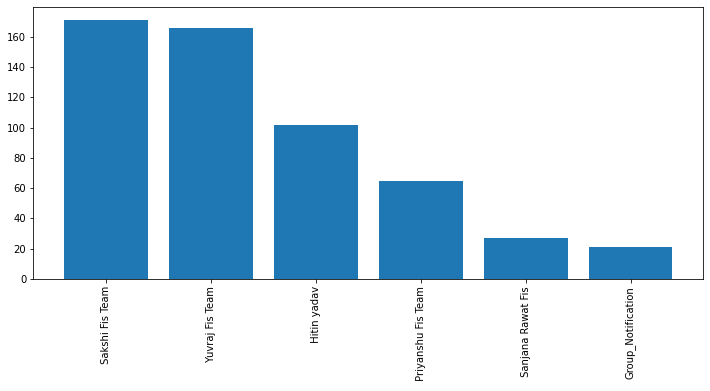

In [50]:
x = df['user'].value_counts()
name = x.index
count = x.values

# plotting bar graph
plt.figure(figsize= (12,5))
plt.bar(name,count)
plt.xticks(rotation = 'vertical')
plt.show()

In [51]:
round(df['user'].value_counts()/df.shape[0]*100,2).reset_index().rename(columns={'index':'name','user':'percent'})

,name,percent
0,Sakshi Fis Team,30.98
1,Yuvraj Fis Team,30.07
2,Hitin yadav,18.48
3,Priyanshu Fis Team,11.78
4,Sanjana Rawat Fis,4.89
5,Group_Notification,3.80


In [52]:
df['msg1'].str.cat(sep=" ")[:1000]
# Pandas str.cat() is used to concatenate strings to the passed caller series of string. 
# Distinct values from a different series can be passed but the length of both the series has to be same.

' Messages and calls are end to end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.  You created group "Abc"  You changed the subject from "Abc" to "Teen Parinde"  Hah bhai naam sahe hai  Teen parinde 😂😜😂😜😂  Cool hai na  Isliye rakh diya mene  <Media omitted>  <Media omitted>  <Media omitted>  <Media omitted>  <Media omitted>  Guys mai fhum aaya  Ghum *  Abhi mere phone mai itni hi pics hai baaki jagah ki bhi bhejunga tumhe  😂😅😁  Sorry mai video call nhi kr paya kuki waha netwrok nhi aarhe the  Koini bhai 😎  Hm photo dekhkr he enjoy kr lenge  ✌🏻✌🏻😹  Baaki bhi dikhaunga abhi ek baar aajane do mere pass😁😂  Pr bht shi jagah thi yr  Pura alwar ghum dala  Bdia bhai bdiaaa  😅🤗  Oye hoye  <Media omitted>  Mae aur yuvraj bhi virtually ghum liye🤪 photos dekh ke  Koi ni...😁  🤩😇  🆒😂  <Media omitted>  Kitna sexy vieww hai  Hann🤩  Hanna, Bht badi lake thi yh  Pic credit bro 😂😂  Haha okyyy  Kaam hogya kya tum logo ka?  Nopes😭😂  Kro kro aaram 

In [53]:
# removing group_notificaton and media ommitted
temp = df[df['user'] != 'Group_Notification']
temp = temp[temp['msg1'] != ' <Media omitted>']

In [54]:
temp.head()

,user,msg1,time2,year,month,day,hour,min
3,Yuvraj Fis Team,Hah bhai naam sahe hai,2021-08-25 13:50:00,2021,August,25,13,50
4,Yuvraj Fis Team,Teen parinde 😂😜😂😜😂,2021-08-25 13:50:00,2021,August,25,13,50
5,Hitin yadav,Cool hai na,2021-08-25 13:52:00,2021,August,25,13,52
6,Hitin yadav,Isliye rakh diya mene,2021-08-25 13:52:00,2021,August,25,13,52
12,Hitin yadav,Guys mai fhum aaya,2021-08-25 13:53:00,2021,August,25,13,53


In [55]:
import re
import pickle
from emot.emo_unicode import UNICODE_EMOJI, EMOTICONS_EMO



# replacing emoticons with their names in data
def convert_emojis(text):
    for emot in UNICODE_EMOJI:
        text = text.replace(emot, "_".join(UNICODE_EMOJI[emot].replace(",","").replace(":","").split()))
    return text
# Example
text1 = "Hilarious 😂. The feeling of making a sale 😎, The feeling of actually fulfilling orders 😒"
print(convert_emojis(text1))


temp['msg1'] = temp['msg1'].apply(convert_emojis)

Hilarious face_with_tears_of_joy. The feeling of making a sale smiling_face_with_sunglasses, The feeling of actually fulfilling orders unamused_face


In [56]:
temp.head()

,user,msg1,time2,year,month,day,hour,min
3,Yuvraj Fis Team,Hah bhai naam sahe hai,2021-08-25 13:50:00,2021,August,25,13,50
4,Yuvraj Fis Team,Teen parinde face_with_tears_of_joywinking_fa...,2021-08-25 13:50:00,2021,August,25,13,50
5,Hitin yadav,Cool hai na,2021-08-25 13:52:00,2021,August,25,13,52
6,Hitin yadav,Isliye rakh diya mene,2021-08-25 13:52:00,2021,August,25,13,52
12,Hitin yadav,Guys mai fhum aaya,2021-08-25 13:53:00,2021,August,25,13,53


In [57]:
# removing stopwords
from nltk.corpus import stopwords
b1= stopwords.words('english')

In [58]:
b1[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [59]:
f = open('stop_hinglish.txt','r')
b2 = f.read()

In [60]:
import re

text = 'hello world @8234567891'
print (re.findall('@.{10}',text))

['@8234567891']


In [61]:
d=[]
for i in range(0,1001):
    d.append(str(i))

In [62]:
# removing no. of group member tags on groups like @8989898989
n= []
for i in temp['msg1']:
    n.extend(re.findall('@.{12}',i))  
    
print(n)
print("\n********\n")


r=[]
for i in temp['msg1']:
    r1=[]
    for j in i.lower().split():
        if j not in n and j not in b2 and j not in b1 and j not in d:
            r1.append(j)
    r.append(r1) 
    
print("\n********\n")
print(len(r))
print("\n********\n")
print(r[:40])

['@919431571432', '@919431571432', '@919431571432', '@918700219435', '@918700219435', '@919431571432', '@919431571432', '@919012429391', '@918882992849', '@919431571432', '@919431571432', '@918882992849', '@918700219435', '@919431571432', '@919431571432', '@919773577656', '@919773577656', '@918700219435', '@918882992849', '@919431571432', '@919431571432', '@918700219435', '@918882992849', '@919431571432', '@918882992849', '@919431571432', '@919773577656', '@919773577656', '@919431571432', '@919431571432', '@919773577656', '@919431571432', '@919431571432', '@918882992849', '@918700219435', '@919431571432', '@919773577656', '@919773577656', '@918882992849', '@918700219435']

********


********

433

********

[['naam', 'sahe'], ['parinde', 'face_with_tears_of_joywinking_face_with_tongueface_with_tears_of_joywinking_face_with_tongueface_with_tears_of_joy'], ['cool'], [], ['guys', 'fhum'], ['ghum', '*'], ['phone', 'pics', 'baaki', 'jagah', 'bhejunga', 'tumhe'], ['face_with_tears_of_joygri

In [63]:
temp['msg1']

3                                 Hah bhai naam sahe hai
4       Teen parinde face_with_tears_of_joywinking_fa...
5                                            Cool hai na
6                                  Isliye rakh diya mene
12                                    Guys mai fhum aaya
                             ...                        
561     face_with_hand_over_mouthface_with_hand_over_...
562         @918700219435  bhai bhe confirmation de dega
566     https //youtube.com/shorts/_AAI7JA505w?featur...
567     Aaj @919431571432 @919773577656  tum dono ne ...
569     Kha ho sablog ?? @919773577656 @918882992849 ...
Name: msg1, Length: 433, dtype: object

In [64]:
temp['msg22']= r

In [65]:
temp.head()

,user,msg1,time2,year,month,day,hour,min,msg22
3,Yuvraj Fis Team,Hah bhai naam sahe hai,2021-08-25 13:50:00,2021,August,25,13,50,"[naam, sahe]"
4,Yuvraj Fis Team,Teen parinde face_with_tears_of_joywinking_fa...,2021-08-25 13:50:00,2021,August,25,13,50,"[parinde, face_with_tears_of_joywinking_face_w..."
5,Hitin yadav,Cool hai na,2021-08-25 13:52:00,2021,August,25,13,52,[cool]
6,Hitin yadav,Isliye rakh diya mene,2021-08-25 13:52:00,2021,August,25,13,52,[]
12,Hitin yadav,Guys mai fhum aaya,2021-08-25 13:53:00,2021,August,25,13,53,"[guys, fhum]"


In [66]:
def string(a):
    return " ".join(a)

temp['msg22'] = temp['msg22'].apply(string)

In [67]:
temp.head()

,user,msg1,time2,year,month,day,hour,min,msg22
3,Yuvraj Fis Team,Hah bhai naam sahe hai,2021-08-25 13:50:00,2021,August,25,13,50,naam sahe
4,Yuvraj Fis Team,Teen parinde face_with_tears_of_joywinking_fa...,2021-08-25 13:50:00,2021,August,25,13,50,parinde face_with_tears_of_joywinking_face_wit...
5,Hitin yadav,Cool hai na,2021-08-25 13:52:00,2021,August,25,13,52,cool
6,Hitin yadav,Isliye rakh diya mene,2021-08-25 13:52:00,2021,August,25,13,52,
12,Hitin yadav,Guys mai fhum aaya,2021-08-25 13:53:00,2021,August,25,13,53,guys fhum


In [68]:
from collections import Counter

In [69]:
w111=[]
for i in r:
    w111.extend(i)
    
print(w111[:30])
print("\n**********************************\n")
print(Counter(w111[:30]))

['naam', 'sahe', 'parinde', 'face_with_tears_of_joywinking_face_with_tongueface_with_tears_of_joywinking_face_with_tongueface_with_tears_of_joy', 'cool', 'guys', 'fhum', 'ghum', '*', 'phone', 'pics', 'baaki', 'jagah', 'bhejunga', 'tumhe', 'face_with_tears_of_joygrinning_face_with_sweatbeaming_face_with_smiling_eyes', 'sorry', 'video', 'call', 'paya', 'kuki', 'netwrok', 'aarhe', 'koini', 'smiling_face_with_sunglasses', 'photo', 'dekhkr', 'enjoy', 'lenge', 'victory_handlight_skin_tonevictory_handlight_skin_tonecat_with_tears_of_joy']

**********************************

Counter({'naam': 1, 'sahe': 1, 'parinde': 1, 'face_with_tears_of_joywinking_face_with_tongueface_with_tears_of_joywinking_face_with_tongueface_with_tears_of_joy': 1, 'cool': 1, 'guys': 1, 'fhum': 1, 'ghum': 1, '*': 1, 'phone': 1, 'pics': 1, 'baaki': 1, 'jagah': 1, 'bhejunga': 1, 'tumhe': 1, 'face_with_tears_of_joygrinning_face_with_sweatbeaming_face_with_smiling_eyes': 1, 'sorry': 1, 'video': 1, 'call': 1, 'paya': 1, 'kuk

In [70]:
 cw = pd.DataFrame(Counter(w111).most_common(10)).rename(columns={0:'words',1:'frequency_count'})
cw

,words,frequency_count
0,happy,17
1,birthday,13
2,face_with_tears_of_joyface_with_tears_of_joy,11
3,sakshi,11
4,baat,9
5,office,6
6,call,5
7,haha,5
8,hitin,5
9,debjeet,5


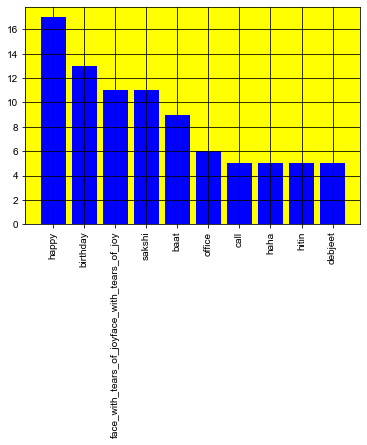

In [71]:
fig,ax = plt.subplots()
ax.bar(cw['words'],cw['frequency_count'],color='blue')
plt.grid(axis='both',color='black')
ax.set_facecolor("yellow")
sns.set_style('dark')
plt.xticks(rotation = 'vertical')
plt.show()


In [72]:
df['msg1']

0       Messages and calls are end to end encrypted. ...
1                                You created group "Abc"
2       You changed the subject from "Abc" to "Teen P...
3                                 Hah bhai naam sahe hai
4                                     Teen parinde 😂😜😂😜😂
                             ...                        
567     Aaj @919431571432 @919773577656  tum dono ne ...
568                                      <Media omitted>
569     Kha ho sablog ?? @919773577656 @918882992849 ...
570                                      <Media omitted>
571            Yuvraj Fis Team changed this group's icon
Name: msg1, Length: 552, dtype: object

In [73]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [74]:
import emoji

c= '😒'
c1 = '❤️'
print(c1 in emoji.UNICODE_EMOJI['en'])
print(c in emoji.UNICODE_EMOJI['en'])

True
True


In [75]:
e=[]
for i in df['msg1']:
    e.extend([j for j in i if j in emoji.UNICODE_EMOJI['en']])
    
print(e[:20])

['😂', '😜', '😂', '😜', '😂', '😂', '😅', '😁', '😎', '✌', '🏻', '✌', '🏻', '😹', '😁', '😂', '😅', '🤗', '🤪', '😁']


In [76]:
pd.DataFrame(Counter(e).most_common(10))

,0,1
0,😂,105
1,🤣,36
2,❤,28
3,😅,25
4,🤪,17
5,♥,13
6,🥳,12
7,🥂,12
8,😁,9
9,🏻,9


In [77]:
ce = pd.DataFrame(Counter(e).most_common(5)).rename(columns={0:'emoji',1:'frequency_count'})

In [78]:
ce.index.rename('index',inplace=True)

In [79]:
ce

,emoji,frequency_count
index,,
0,😂,105
1,🤣,36
2,❤,28
3,😅,25
4,🤪,17


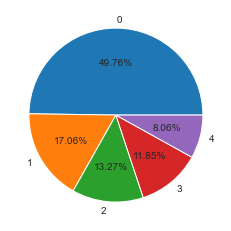

In [80]:
plt.pie(ce['frequency_count'],labels = ce.index,autopct="%0.2F%%")
plt.show()

In [81]:
df['mont_num'] = df['time2'].dt.month

In [82]:
df

,user,msg1,time2,year,month,day,hour,min,mont_num
0,Group_Notification,Messages and calls are end to end encrypted. ...,2021-08-25 13:46:00,2021,August,25,13,46,8
1,Group_Notification,"You created group ""Abc""",2021-08-25 13:46:00,2021,August,25,13,46,8
2,Group_Notification,"You changed the subject from ""Abc"" to ""Teen P...",2021-08-25 13:48:00,2021,August,25,13,48,8
3,Yuvraj Fis Team,Hah bhai naam sahe hai,2021-08-25 13:50:00,2021,August,25,13,50,8
4,Yuvraj Fis Team,Teen parinde 😂😜😂😜😂,2021-08-25 13:50:00,2021,August,25,13,50,8
...,...,...,...,...,...,...,...,...,...
567,Yuvraj Fis Team,Aaj @919431571432 @919773577656 tum dono ne ...,2022-04-03 20:09:00,2022,April,3,20,9,4
568,Yuvraj Fis Team,<Media omitted>,2022-04-03 20:09:00,2022,April,3,20,9,4
569,Sakshi Fis Team,Kha ho sablog ?? @919773577656 @918882992849 ...,2022-04-06 00:13:00,2022,April,6,0,13,4
570,Priyanshu Fis Team,<Media omitted>,2022-04-06 00:30:00,2022,April,6,0,30,4


In [83]:
timeline = df.groupby(['year','mont_num','month']).count()['msg1'].reset_index()
timeline

,year,mont_num,month,msg1
0,2021,8,August,78
1,2021,9,September,71
2,2021,10,October,108
3,2021,11,November,22
4,2021,12,December,62
5,2022,1,January,119
6,2022,2,February,42
7,2022,3,March,44
8,2022,4,April,6


In [84]:
timeline.shape[0]

9

In [85]:
t = []
for i in range(timeline.shape[0]):
    t.append(timeline['month'][i] + "-" + str(timeline['year'][i])) 

In [86]:
timeline['timmi'] = t

In [87]:
timeline

,year,mont_num,month,msg1,timmi
0,2021,8,August,78,August-2021
1,2021,9,September,71,September-2021
2,2021,10,October,108,October-2021
3,2021,11,November,22,November-2021
4,2021,12,December,62,December-2021
5,2022,1,January,119,January-2022
6,2022,2,February,42,February-2022
7,2022,3,March,44,March-2022
8,2022,4,April,6,April-2022


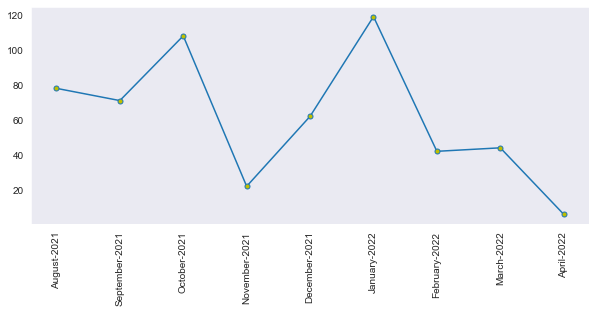

In [88]:
plt.figure(figsize=(10,4))
plt.plot(timeline['timmi'],timeline['msg1'],marker='.',mfc ='y',ms=10)
plt.xticks(rotation='vertical')
plt.show()

In [89]:
ce['frequency_count']

index
0    105
1     36
2     28
3     25
4     17
Name: frequency_count, dtype: int64

In [90]:
df

,user,msg1,time2,year,month,day,hour,min,mont_num
0,Group_Notification,Messages and calls are end to end encrypted. ...,2021-08-25 13:46:00,2021,August,25,13,46,8
1,Group_Notification,"You created group ""Abc""",2021-08-25 13:46:00,2021,August,25,13,46,8
2,Group_Notification,"You changed the subject from ""Abc"" to ""Teen P...",2021-08-25 13:48:00,2021,August,25,13,48,8
3,Yuvraj Fis Team,Hah bhai naam sahe hai,2021-08-25 13:50:00,2021,August,25,13,50,8
4,Yuvraj Fis Team,Teen parinde 😂😜😂😜😂,2021-08-25 13:50:00,2021,August,25,13,50,8
...,...,...,...,...,...,...,...,...,...
567,Yuvraj Fis Team,Aaj @919431571432 @919773577656 tum dono ne ...,2022-04-03 20:09:00,2022,April,3,20,9,4
568,Yuvraj Fis Team,<Media omitted>,2022-04-03 20:09:00,2022,April,3,20,9,4
569,Sakshi Fis Team,Kha ho sablog ?? @919773577656 @918882992849 ...,2022-04-06 00:13:00,2022,April,6,0,13,4
570,Priyanshu Fis Team,<Media omitted>,2022-04-06 00:30:00,2022,April,6,0,30,4


In [91]:
df['day_name'] = df['time2'].dt.day_name()

In [92]:
df['hour1'] = df['hour'].replace(0,24)

In [93]:
n1 = [1,2,3,4,5,6,7,8,9,10,11,0]
n2 = []
for i in df['hour']:
    if i in n1:
        #print(str(i),"pm")
        n2.append((str(i) + ".00" + " am"))
    else:
        #print(str(i),"am")
        n2.append((str(i) + ".00" + " pm"))
    
n2[:5]

['13.00 pm', '13.00 pm', '13.00 pm', '13.00 pm', '13.00 pm']

In [94]:
df['hour22']=n2

In [95]:
pv = pd.pivot_table(df,index="day_name",columns='hour22',values='msg1',aggfunc='count').fillna(0)
pv

hour22,0.00 am,1.00 am,10.00 am,11.00 am,12.00 pm,13.00 pm,14.00 pm,15.00 pm,16.00 pm,17.00 pm,...,2.00 am,20.00 pm,21.00 pm,22.00 pm,23.00 pm,4.00 am,5.00 am,7.00 am,8.00 am,9.00 am
day_name,,,,,,,,,,,,,,,,,,,,,
Friday,14.0,4.0,9.0,0.0,7.0,2.0,1.0,0.0,3.0,8.0,...,5.0,2.0,9.0,4.0,5.0,0.0,0.0,0.0,1.0,1.0
Monday,18.0,1.0,7.0,11.0,2.0,2.0,1.0,1.0,8.0,11.0,...,0.0,1.0,1.0,5.0,6.0,0.0,0.0,0.0,1.0,3.0
Saturday,4.0,0.0,11.0,1.0,0.0,0.0,14.0,0.0,3.0,17.0,...,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
Sunday,12.0,3.0,2.0,0.0,0.0,2.0,2.0,1.0,10.0,6.0,...,2.0,4.0,7.0,2.0,5.0,1.0,1.0,1.0,4.0,3.0
Thursday,35.0,3.0,12.0,3.0,0.0,1.0,4.0,2.0,1.0,9.0,...,5.0,1.0,0.0,3.0,4.0,0.0,0.0,0.0,3.0,7.0
Tuesday,0.0,0.0,0.0,40.0,5.0,5.0,7.0,1.0,1.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wednesday,15.0,0.0,1.0,12.0,5.0,23.0,10.0,0.0,0.0,0.0,...,1.0,5.0,1.0,6.0,3.0,0.0,0.0,0.0,2.0,0.0


<AxesSubplot:xlabel='hour22', ylabel='day_name'>

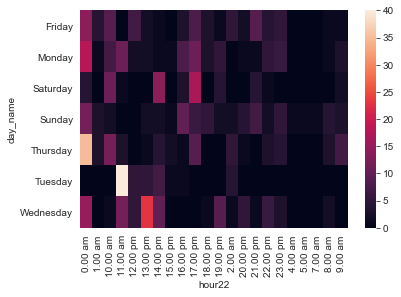

In [96]:
sns.heatmap(pv)

In [98]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [99]:
obj=SentimentIntensityAnalyzer()

In [100]:
obj.polarity_scores("you will be killed by our company")

{'neg': 0.429, 'neu': 0.571, 'pos': 0.0, 'compound': -0.6705}

In [101]:
l = ''.join(temp['msg22'])
l[:1000]

'naam saheparinde face_with_tears_of_joywinking_face_with_tongueface_with_tears_of_joywinking_face_with_tongueface_with_tears_of_joycoolguys fhumghum *phone pics baaki jagah bhejunga tumheface_with_tears_of_joygrinning_face_with_sweatbeaming_face_with_smiling_eyessorry video call paya kuki netwrok aarhekoini smiling_face_with_sunglassesphoto dekhkr enjoy lengevictory_handlight_skin_tonevictory_handlight_skin_tonecat_with_tears_of_joybaaki dikhaunga aajane passbeaming_face_with_smiling_eyesface_with_tears_of_joyjagahalwar ghum dalabdia bdiaaagrinning_face_with_sweathugging_faceyuvraj virtually ghum liyezany_face photosni...beaming_face_with_smiling_eyesstar-strucksmiling_face_with_halocool_buttonface_with_tears_of_joysexy viewwhannstar-struckhanna, badi lakepic credit face_with_tears_of_joyface_with_tears_of_joyhaha okyyykaam hogya ka?nopesloudly_crying_faceface_with_tears_of_joykro kro aaram seface_with_tears_of_joyface_with_tears_of_joyhaha yahe passsakshi bhejataki laga iconwinking_f

In [102]:
a = obj.polarity_scores(l)
a

{'neg': 0.014, 'neu': 0.736, 'pos': 0.25, 'compound': 0.9994}

In [103]:
obj.polarity_scores(l)['pos']

0.25

In [104]:
print(str(a['pos']*100) + "%" )

25.0%


In [105]:
round(a['pos']*100,2)

25.0